<a href="https://colab.research.google.com/github/jihyuk1023/AI_physics/blob/main/05_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch vs Tensorflow

pytorch와 tensorflow는 딥러닝 전용 패키지입니다. 두 패키지를 사용하면, 전 수업에서 사용했던 상당부분의 코드들이 이미 구현되어 있으며, 다양한 시각화 방법과 다양한 레이어들을 사용할 수 있으므로 굳이 복잡한 코드들을 구현하지 않아도 됩니다. 

딥러닝 내부의 연산들을 한번 들여다 보기 위해서 직접 연산을 하는 과정을 코드 내에 전부 포함하였지만, 실제로 딥러닝 모델을 만들 때에는 이런 연산을 직접 계산할 필요가 없습니다. 토치나 텐서플로우의 모듈이 이를 알아서 처리해 줄 것입니다. 

또한 위 모듈을 사용하면, GPU를 쉽게 사용할 수 있습니다. 파이썬 numpy 역시 cupy라는 CUDA를 지원하는 모듈을 통해 모델을 GPU에 넣을 수 있지만, pytorch나 tensorflow에 비해서 GPU에 데이터를 저장하는 것은 쉽지 않습니다. GPU는 병렬연산에 있어서 CPU에 비해 매우 빠른 속도를 자랑하고, 그 격차가 점점 벌어지고 있으므로 딥러닝 행렬 연산에 있어서 GPU를 사용할 수 있다는 것은 매우 큰 장점입니다.

tensorflow는 2015년 Google이 만든 딥러닝 패키지이고, torch는 2017년 페이스북이 만든 딥러닝 패키지입니다. 두 패키지 모두 많은 장점을 가지고 있습니다. 

파이토치는 텐서플로우에 비해 내부 구조를 쉽게 열어볼 수 있다는 장점이 있고, 훨씬 파이썬스러운 코딩이 가능하며, 수정이 용이하고 직관적입니다. 

텐서플로우는 2.0 버전 이후로 keras를 주로 사용하게 되었습니다. 
keras는 아주 간단하게 모델을 만드는데 최적화 되어 있습니다. 변수 몇가지만 설정해주면 쉽게 모델이 만들어집니다. 다만, 내부 구조를 확인하고 실제 코드를 변경하는 데 있어서는 쉽지 않습니다. 코드가 고정적이고 유동적인 모델 형성이 힘듭니다.

최근 파이토치의 사용 비중이 텐서플로우에 비해서 높으며 많은 연구가 pytorch를 기반으로 이루어져 있기 때문에 pytorch를 위주로 코드를 작성할 것입니다.
tensorflow의 코드를 읽을 수 있을 정도의 공부는 필요할 것입니다.

원한다면, tensorflow의 코드를 사용하여 모델을 작성하여도 좋습니다.

pytorch, tensorflow는 colab 환경에서 이미 사용할 수 있습니다. 로컬 컴퓨터에서 이를 학습시키려고 한다면 pytorch나 tensoflow를 설치하여야 합니다.

이 자료는 pytorch tutorial https://tutorials.pytorch.kr/beginner 에서 구현된 코드들을 조금씩 재구성하여 만들어진 자료입니다. 

# Torch 사용법 익히기



> torch 모듈 import 하기



In [ ]:
import torch

> torch의 기본 자료형, tensor

torch는 기본적으로 자료형으로 tensor를 사용합니다. numpy의 array와 유사한 자료형이라는 것을 알 수 있습니다. 두 자료형이 서로 호환되기는 하지만, 토치 모델에 학습시킬 때에는 항상 tensor를 사용해야 합니다. tensor는 변화를 저장할 수 있다는 점에서 넘파이 어레이와 차별성을 갖습니다.


In [ ]:
a = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])

print(a)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
b = torch.empty(5,3)

print(b)

tensor([[3.1177e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 1.1876e-36]])


empty는 초기화 되지 않은 텐서를 내보냅니다. 그 메모리 안에 저장되어 있던 값들이 바로 호출되는 것이므로 값을 가지고 있는 것입니다.

In [ ]:
c = torch.zeros(2,5)
print(c)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
d = torch.rand(5, 3)
print(d)

tensor([[0.6592, 0.0359, 0.3733],
        [0.8904, 0.6602, 0.0548],
        [0.0902, 0.9820, 0.4006],
        [0.0654, 0.5933, 0.3727],
        [0.2447, 0.2188, 0.4948]])


안의 dtype을 변경할 수 있습니다. long은 정수형 타입인데, C 언어에서 long을 정수로 사용하기 때문입니다. long이 나온다면 int와 같은 의미로 해석하면 됩니다.



In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


tensor.size() 함수를 사용해 텐서의 사이즈를 리턴합니다. Size 자료형은 tuple과 완전히 동일합니다.

In [ ]:
x.size()

torch.Size([5, 3])

tensor.view() 함수를 사용해 reshape 할 수 있습니다.

In [ ]:
a = x.view(1,15)
a.size()

torch.Size([1, 15])

torch는 여러 연산을 지원합니다.

In [ ]:
a = torch.ones(3,3)
b = torch.arange(1,10).view(3,3)

print("a = {}".format(a))
print("b = {}".format(b))
print("a+b = {}".format(a+b))

#torch.add 함수를 이용하여 더할 수 있습니다.
print(torch.add(a,b))

#a를 a와 b의 합으로 변경합니다.
a.add_(b)
print("a is now {}".format(a))

a = tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
b = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
a+b = tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])
tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])
a is now tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])


텐서에 값이 하나만 존재한다면, item 함수를 통해 그 값을 얻어낼 수 있습니다.

In [ ]:
total = a.sum()
total.item()

54.0

텐서를 numpy 어레이 자료형으로 변경할 수 있습니다.

In [ ]:
import numpy as np

print(a)
print(a.numpy())

tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])
[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]


넘파이 어레이도 텐서로 변경할 수 있습니다. 그러나 넘파이 어레이와 텐서는 연산이 불가능합니다.

In [ ]:
a = np.ones((5,3))
b = torch.from_numpy(a)

print(a+b)

TypeError: ignored

In [ ]:
print(type(b))
print(type(a))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


# GPU 사용하기

코랩에서는 GPU를 사용할 수 있습니다. GPU를 사용하면 성능을 크게 끌어올릴 수 있을 것입니다. 상단의 

런타임 -> 런타임 유형 변경 -> 하드웨어 가속기 None에서 GPU로 변경


하면 GPU를 사용할 수 있습니다. 그러나 코랩의 GPU 가속에는 제한 시간이 있습니다. 따라서 필요하지 않을 때에는 GPU를 사용하지 않아야 합니다.


In [ ]:
# 런타임 변경 이전

print(torch.cuda.is_available())

True


In [ ]:
#런타임 변경 이후

print(torch.cuda.is_available())

True


In [ ]:
x = torch.tensor([1,2,3])
print(x)

tensor([1, 2, 3])


In [ ]:
if torch.cuda.is_available(): 
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
                                      # CUDA 장치 객체(device object)로
y = torch.ones_like(x, device=device)  # GPU 상에 직접적으로 tensor를 생성하거나
x = x.to(device)                       # ``.to("cuda")`` 를 사용하면 됩니다.
z = x + y
print(z)
print(z.to("cpu", dtype = torch.double)) 

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], device='cuda:0')
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


한 가지 유의할 점은, gpu상의 텐서와 cpu상의 텐서는 연산할 수 없다는 것입니다. 따라서, 항상 연산할 텐서는 같은 디바이스에 올려져 있어야 합니다.

In [ ]:
x = torch.ones(3,3, device=device)
y = torch.ones(3,3)

z = x+y

RuntimeError: ignored

# Autograd

토치 텐서는 그 변화율을 저장하도록 설정할 수 있습니다. 즉, 텐서는 자동으로 역전파를 저장합니다. 텐서의 특징을 잘 활용하면 복잡한 계산이였던 Backpropagation을 알아서 처리하도록 할 수 있습니다. 텐서를 생성할 때

requires_grad = True

로 지정하면 텐서는 그 변화들을 저장합니다.

텐서의 변화율은 .backward() 함수를 통해 확인할 수 있습니다.

In [ ]:
x = torch.tensor([[0,1],[2,3]], dtype=torch.float64, requires_grad=True)
print(x)

y = 2*x
print(y)

tensor([[0., 1.],
        [2., 3.]], dtype=torch.float64, requires_grad=True)
tensor([[0., 2.],
        [4., 6.]], dtype=torch.float64, grad_fn=<MulBackward0>)


grad_fn에 <AddBackward0> 라고 적혀 있는 것을 확인할 수 있습니다.
이제 tensor의 합을 계산해 보겠습니다.


In [ ]:
z = torch.mean(y)
print(z)

tensor(3., dtype=torch.float64, grad_fn=<MeanBackward0>)


역전파를 계산합니다.

In [ ]:
z.backward()

그러면, x는 grad라는 property를 갖습니다.

In [ ]:
x.grad

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]], dtype=torch.float64)

이 grad는 x의 각 원소에 대한 z의 변화도, 즉 야코비안 행렬입니다. 
만약 z가 cost function, x가 weight 라고 가정해 봅시다. 
그러면 x.grad는 코스트에 대한 weight의 미분값이 되겠군요.
tensor를 backward함으로써 바로 오차역전파 (back propagation)이 일어납니다. 즉, tensor 자료형은 back propagation을 쉽게 지원합니다.

torch.no_grad()로 코드 블럭을 감싸면, 텐서의 back propagation 추적을 막을 수도 있습니다.

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

# Neural network

파이토치에는 우리가 지난 시간에 만들었던 네트워크가 이미 구현되어 있습니다.
우리가 전에 구현했던 네트워크는 이제는 tensorflow의 내장 모듈인 keras의 모델과 유사한 형식입니다. 그래서 구현한 네트워크의 형태가 조금 다를 수 있습니다. 그러나 모델을 잘 뜯어보면 우리가 구현해야 하는 모든 기능들을 구현할 수 있음을 알 수 있습니다.

한 번 pytorch tutorial에서 구현한 코드를  재구성하여 pytorch neural network의 사용법을 익혀보겠습니다. 모델의 형태는 전 단원에서 구현한 코드와 완벽하게 동일합니다.

규제는 사용하지 않았습니다.

In [ ]:
# 필요한 모듈 임포트하기.
# nn은 neural network의 약어입니다. 파이토치에서 neural network를 구성하는 요소들은 이 안에 구현되어 있습니다.
# 특별히 nn.Functional에는 필요한 함수들이 들어 있습니다. 우리가 전 단원에서 정의한 activation function, loss function등이 구현되어 있는 내장 모듈입니다.
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module): #pytorch의 nn.Module은 모든 클래스의 메소드들이 정의되어 있는 클래스입니다. 이를 상위 클래스로 받으면, Net 클래스는 이에 소속된 모든 메소드와 변수들을 갖게 됩니다.

    def __init__(self):
        super(Net, self).__init__()
        self.dense_1 = nn.Linear(784, 128)
        self.dense_2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.dense_1(x)
        x = torch.sigmoid(self.dense_2(x))
        return x

In [ ]:
net = Net()
print(net)

Net(
  (dense_1): Linear(in_features=784, out_features=128, bias=True)
  (dense_2): Linear(in_features=128, out_features=10, bias=True)
)


forward함수에서 x를 인풋으로 받고, 층들을 통과한 x가 output으로 출력됩니다.
backpropagation은 정의할 필요가 없습니다. forward에서 사용된 input은 이미 autograd를 사용할 수 있는 변수이기 때문입니다.

모델의 학습가능한 파라미터들은 다음과 같이 얻을 수 있습니다.

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # dense 1 weight
print(params[1].size()) # dense 1 bias
print(params[2].size()) # dense 2 weight
print(params[3].size()) # dense 2 bias

4
torch.Size([128, 784])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


손실함수와 optimizer를 설정하겠습니다. optimizer란 gradient descent와 같은 파라미터의 수정 방법에 관한 함수입니다.

그를 위해서 일단 노이즈 데이터를 하나 만들어 보도록 하겠습니다. MNIST data와 크기는 같은 28*28의 데이터이지만 숫자 데이터는 아닙니다.

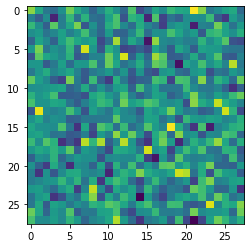

In [ ]:
dummy_input = torch.randn(28,28)

import matplotlib.pyplot as plt
plt.imshow(dummy_input)
plt.show()

dummy input을 네트워크에 집어넣으면 output을 얻습니다.
이 output을 CrossEntropyLoss에 집어넣겠습니다. 주어진 dummy_loss를 우선 flatten하게 784로 펼치겠습니다. 그리고 이 dummy_input이 답으로 얻기를 바라는 dummy_target을 정의하겠습니다. 
파이토치에서는 one_hot_encoding된 target을 넣으면 연산이 되지 않습니다.
원래 int값을 적용하겠습니다.

In [ ]:
dummy_input = dummy_input.view(1,-1)
dummy_target = torch.tensor([5])
print(dummy_target)

tensor([5])


In [ ]:
output = net(dummy_input)
criterion = nn.CrossEntropyLoss()
loss = criterion(output, dummy_target)
print(loss)


tensor(2.3133, grad_fn=<NllLossBackward>)


오차를 역전파 해보겠습니다.

In [ ]:
#back propagation
loss.backward()
net.dense_1.bias.grad

tensor([-4.6796e-04, -1.1895e-02,  1.6979e-02,  1.5139e-03, -1.5662e-02,
        -3.2425e-03,  1.8160e-02, -1.2593e-02,  1.5550e-02, -1.6396e-02,
         3.2972e-03,  8.1329e-03, -1.4968e-02,  9.4167e-03,  1.7725e-02,
         4.5681e-03,  1.1735e-02, -6.6365e-03, -1.0787e-02,  3.9784e-03,
         3.7188e-03,  5.1888e-03,  1.3953e-02, -1.1142e-02, -1.8902e-02,
        -5.8862e-03, -9.3333e-03, -1.0778e-02, -1.3571e-02, -4.0840e-03,
         1.8990e-02, -1.2853e-02,  6.7988e-03,  2.3151e-02,  1.6131e-02,
         3.8695e-03, -2.2751e-03, -9.0483e-03,  1.2309e-02, -2.0316e-03,
         1.2355e-02, -9.5602e-03,  5.2912e-03, -1.8213e-02,  1.5090e-02,
         9.7163e-03,  5.5012e-04, -1.7837e-02, -5.8788e-03, -8.2125e-03,
         2.3570e-03, -5.0382e-03, -1.4320e-02,  7.5262e-03, -1.8168e-02,
         5.6101e-03,  1.7227e-02,  1.9349e-02,  1.4359e-02, -7.8840e-03,
        -1.1548e-02, -1.3946e-02, -2.0967e-03, -1.6763e-03, -8.0240e-03,
        -1.7483e-02,  4.0962e-03, -7.3653e-03,  2.0

SGD를 pytorch로 다음과 같이 구현할 수 있습니다.

In [ ]:
import torch.optim as optim

# Optimizer를 생성합니다.
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 학습 과정(training loop)에서는 다음과 같습니다:
optimizer.zero_grad()   # zero the gradient buffers
output = net(dummy_input)
loss = criterion(output, dummy_target)
# loss.backward()
# optimizer.step()    # Does the update

optimizer는 net의 파라미터들을 수정합니다.
loss의 backward에 의해서 parameter들은 grad를 갖게 되고, 이를 이용하여 optimizer는 그 weight를 수정합니다.


# MNIST Neural Network by Pytorch
옛날 수업에서는 tensorflow의 MNIST 데이터를 사용해서 데이터를 다운받았는데, 이번에는 torch의 데이터 셋을 다운받아 보겠습니다.

torch의 이미지 관련 데이터셋은 torchvision이라는 모듈에 저장되어 있습니다. torch vision에서 데이터를 불러오고, Net을 구현하고, 모델을 학습시키겠습니다.

In [ ]:
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
train_dataset = datasets.MNIST('../mnist_data/',
                             download=True,
                             train=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(), # image to Tensor
                             ])) 

val_dataset = datasets.MNIST("../mnist_data/", 
                             download=False,
                             train=False,
                             transform= transforms.Compose([
                               transforms.ToTensor(),
                           ]))

Extracting ../mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_dataset[0][1]

5

In [ ]:
[print(train_dataset)
print(type(train_dataset))
print(train_dataset.data.shape)
print(val_dataset.data.shape)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../mnist_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.mnist.MNIST'>
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


torch 데이터셋을 다운받았습니다. 그런데 이들은 60000개의 데이터를 전부 가지고 있으므로 batch_size 간격으로 잘라주는 generator가 필요합니다. torch에서는 data_loader라는 함수로 이를 구현해 놓았습니다.

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

위에 있는 Net을 흐름을 위해 다시 복습해봅시다.

In [ ]:
class Net(nn.Module): #pytorch의 nn.Module은 모든 클래스의 메소드들이 정의되어 있는 클래스입니다. 이를 상위 클래스로 받으면, Net 클래스는 이에 소속된 모든 메소드와 변수들을 갖게 됩니다.

    def __init__(self):
        super(Net, self).__init__()
        self.dense_1 = nn.Linear(784, 128)
        self.dense_2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.sigmoid(self.dense_1(x))
        # pytorch의 CrossEntropyLoss가 softmax를 포함하므로 x에는 softmax를 취하지 않습니다.
        x = self.dense_2(x)
        return x

net object를 생성하고 loss function과 optimizer를 다시 정의합니다.

학습을 진행하는 코드입니다. 주석을 보고 따라오기 바랍니다.

In [ ]:
net = Net()
if torch.cuda.is_available():
  net.to('cuda:0')
# loss
criterion = nn.CrossEntropyLoss()
# backpropagation method : Now SGD. 
optimizer = optim.SGD(net.parameters(), lr = 0.01)
# hyper-parameters
num_epochs = 30

train_loss_history = []
val_loss_history = []
for epoch in range(num_epochs):
  train_loss = 0
  for step, data in enumerate(train_loader):
    x, label = data
    if torch.cuda.is_available():
        x = x.cuda()
        label = label.cuda()
    # grad init
    optimizer.zero_grad()
    # forward propagation
    output = net(x)
    # calculate loss
    loss = criterion(output, label)
    # back propagation 
    loss.backward()
    # weight update
    optimizer.step()
    train_loss += loss.item()
  train_loss = train_loss / len(train_loader)
  #매 epoch이 끝날 때마다 validation을 진행합니다.
  with torch.no_grad():
    val_loss = 0.0
    total = 0
    for val_step, val in enumerate(val_loader):
      val_x, val_label = val
      if torch.cuda.is_available():
        val_x = val_x.cuda()
        val_label =val_label.cuda()
      val_output = net(val_x)
      v_loss = criterion(val_output, val_label)
      val_loss += v_loss
      total += (torch.argmax(val_output, dim=1) == val_label).sum().item()
    val_loss = val_loss / len(val_loader)
  print("epoch: {}/{} | train loss: {} | val loss: {}".format(
                epoch+1, num_epochs, train_loss , val_loss))
  print("val_acc: {}".format(total/len(val_dataset)))        
  train_loss_history.append(train_loss)
  val_loss_history.append(val_loss)

epoch: 1/30 | train loss: 1.8756748131434122 | val loss: 1.2876266241073608
val_acc: 0.7648
epoch: 2/30 | train loss: 0.9582959060827891 | val loss: 0.7179878354072571
val_acc: 0.8428
epoch: 3/30 | train loss: 0.6329412841478984 | val loss: 0.5377463698387146
val_acc: 0.8723
epoch: 4/30 | train loss: 0.5097723508675893 | val loss: 0.45299050211906433
val_acc: 0.8851
epoch: 5/30 | train loss: 0.44598485119342807 | val loss: 0.40720897912979126
val_acc: 0.8924
epoch: 6/30 | train loss: 0.40748553855419156 | val loss: 0.3763750195503235
val_acc: 0.898
epoch: 7/30 | train loss: 0.3815042860587438 | val loss: 0.35516732931137085
val_acc: 0.9018
epoch: 8/30 | train loss: 0.3627049109896024 | val loss: 0.3399856984615326
val_acc: 0.9051
epoch: 9/30 | train loss: 0.34820611946980157 | val loss: 0.32776322960853577
val_acc: 0.9076
epoch: 10/30 | train loss: 0.33667714998722076 | val loss: 0.3185065984725952
val_acc: 0.9114
epoch: 11/30 | train loss: 0.3270637927532196 | val loss: 0.310241192579

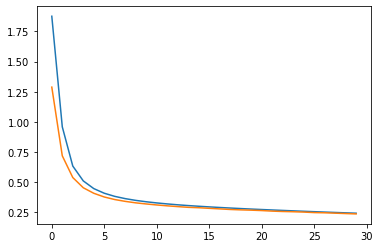

In [ ]:
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.show()